In [4]:
from datascience import *
import numpy as np

import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
%matplotlib inline

## Alameda County Juries

In [5]:
# Data from an ACLU 2010 report
# Racial and Ethnic Disparities in Alameda County Jury Pools
# https://www.aclunc.org/sites/default/files/racial_and_ethnic_disparities_in_alameda_county_jury_pools.pdf

alameda = Table().with_columns(
    'Ethnicity', make_array('Asian', 'Black', 'Latino', 'White', 'Other'),
    'Eligible', make_array(0.15, 0.18, 0.12, 0.54, 0.01),
    'Panels', make_array(0.26, 0.08, 0.08, 0.54, 0.04)
)

alameda.set_format([1, 2], PercentFormatter(0))

Ethnicity,Eligible,Panels
Asian,15%,26%
Black,18%,8%
Latino,12%,8%
White,54%,54%
Other,1%,4%


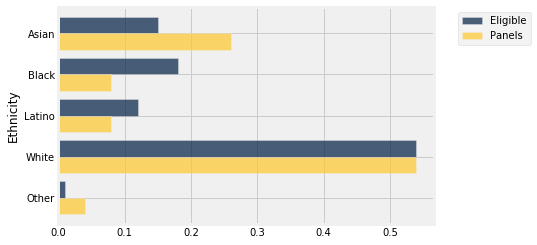

In [6]:
alameda.barh(0)

## Total Variation Distance

In [7]:
diff = alameda.with_column('Difference',
                    alameda.column('Eligible') - alameda.column('Panels'))
diff

Ethnicity,Eligible,Panels,Difference
Asian,15%,26%,-0.11
Black,18%,8%,0.1
Latino,12%,8%,0.04
White,54%,54%,0
Other,1%,4%,-0.03


In [8]:
abs_diff = diff.with_column('Abs. Difference',
                        np.abs(diff.column('Difference')))
abs_diff

Ethnicity,Eligible,Panels,Difference,Abs. Difference
Asian,15%,26%,-0.11,0.11
Black,18%,8%,0.1,0.1
Latino,12%,8%,0.04,0.04
White,54%,54%,0,0
Other,1%,4%,-0.03,0.03


In [9]:
sum(abs_diff.column('Abs. Difference')) / 2

0.14

In [10]:
def total_variation_distance(distribution_1, distribution_2):
    """Each distribution is an array of proportions that sums to 1."""
    return np.abs(distribution_1 - distribution_2).sum()/2

In [11]:
def table_tvd(table, label_1, label_2):
    return total_variation_distance(table.column(label_1), table.column(label_2))

In [12]:
observed = table_tvd(alameda, 'Eligible', 'Panels')
observed

0.14

## Simulating the statistic

In [14]:
def get_one_simulated_panel(t, n):
    return t.select('Ethnicity').sample(n, weights=t.column('Eligible'))

get_one_simulated_panel(alameda, 1453)

Ethnicity
Asian
White
White
Black
White
White
White
Asian
White
Asian


In [15]:
def simulate_once(t, n):
    simulated_panel = get_one_simulated_panel(t, n)
    counts = simulated_panel.group('Ethnicity')
    sim_proportions = counts.select('Ethnicity').with_column('Random',
                                    counts.column('count') / n)
    sim_proportions.set_format(1, PercentFormatter(0))
    return t.join('Ethnicity', sim_proportions)

In [25]:
simulate_once(alameda, 1453)

Ethnicity,Eligible,Panels,Random
Asian,15%,26%,15%
Black,18%,8%,17%
Latino,12%,8%,12%
Other,1%,4%,1%
White,54%,54%,54%


In [26]:
# Compute the empirical distribution of TVDs

tvds = make_array()

for i in np.arange(1000): # 1000 repetitions of the simulation
    sim_results = simulate_once(alameda, 1453)
    tvds = np.append(tvds, table_tvd(sim_results, 'Eligible', 'Random'))

results = Table().with_column('TVD', tvds)
results

TVD
0.0179422
0.00974535
0.00942189
0.0117481
0.00971094
0.0173159
0.018596
0.0111218
0.0132897
0.0147832


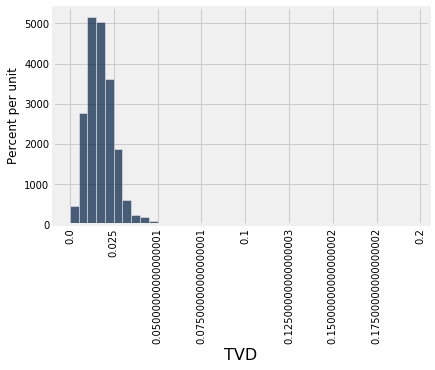

In [27]:
results.hist(bins=np.arange(0, 0.2, 0.005))

## P-value

In [30]:
results.where('TVD', are.above_or_equal_to(0.14)).num_rows / results.num_rows

0.0

## Addendum: Alameda County Race & Ethnicity Distribution

In [ ]:
# According to the 2010 Census, https://www.census.gov/2010census/popmap/

alameda_race = Table(['Race', 'Population']).with_rows([
    ['White', 649122],
    ['African American', 190451],
    ['Asian', 394560],
    ['AIAN', 9799],
    ['NHPI', 12802],
    ['Some Other Race', 162540],
    ['Two or more Races', 90997],
])

alameda_race.set_format(1, DistributionFormatter).show()

alameda_ethnicity = Table(['Ethnicity', 'Population']).with_rows([
    ['Hispanic or Latino', 339889],
    ['Not Hispanic or Latino', 1170382],
])

alameda_ethnicity.set_format(1, DistributionFormatter).show()

In [ ]:
alameda

## P-Value

In [ ]:
results.where(0, are.above_or_equal_to(observed)).num_rows / results.num_rows

## Swain v. Alabama, repeat

In [ ]:
swain = Table().with_columns(
    'Ethnicity', make_array('Black', 'Other'),
    'Eligible', make_array(0.26, 0.74),
    'Panel', make_array(0.08, 0.92)
)

swain.set_format([1, 2], PercentFormatter(0))

In [ ]:
swain.barh(0)

In [ ]:
simulate_once(swain, 100)

In [ ]:
# Compute the empirical distribution of TVDs

tvds = make_array()

for i in np.arange(10000): # 10000 repetitions of the simulation
    sim_results = simulate_once(swain, 100)
    tvds = np.append(tvds, table_tvd(sim_results, 'Eligible', 'Random'))

results = Table().with_column('TVD between the population & a random sample', tvds)
results

In [ ]:
results.hist(bins=np.arange(0, 0.20, 0.010))

# Birth months

What month were you born in?

* A) Jan-Mar
* B) Apr-Jun
* C) Jul-Sep
* D) Oct-Dec

In [ ]:
birth_month = Table().with_columns(
    "Month", make_array("Jan-Mar", "Apr-Jun", "Jul-Sep", "Oct-Dec"),
    "Count", make_array(5,5,5,5))
birth_month

In [ ]:
size_of_class = sum(birth_month.column("Count"))
observed = sum(abs(birth_month.column("Count")/size_of_class - .25))
observed

How likely is this distribution of birth months?

In [ ]:
random_counts = birth_month.select("Month").sample(size_of_class).group("Month")
random_counts

In [ ]:
tvds = make_array()
for i in np.arange(10000): # 10000 repetitions
    random_counts = birth_month.select("Month").sample(size_of_class).group("Month").column("count")
    tvd = sum(abs(random_counts/sum(random_counts) - .25))
    tvds = np.append(tvds, tvd)
    
results = Table().with_column('TVD', tvds)

In [ ]:
results

In [ ]:
results.hist()

In [ ]:
results.where('TVD', are.above_or_equal_to(observed)).num_rows / 10000